In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("debtData.csv")
print(df)

     CustomerID  Age  EducationLevel  YearsEmployed  Income  CardDebt  \
0             1   41               2              6      19     0.124   
1             2   47               1             26     100     4.582   
2             3   33               2             10      57     6.111   
3             4   29               2              4      19     0.681   
4             5   47               1             31     253     9.308   
..          ...  ...             ...            ...     ...       ...   
845         846   27               1              5      26     0.548   
846         847   28               2              7      34     0.359   
847         848   25               4              0      18     2.802   
848         849   32               1             12      28     0.116   
849         850   52               1             16      64     1.866   

     OtherDebt  Defaulted  DebtIncomeRatio  
0        1.073        0.0              6.3  
1        8.218        0.0        

In [10]:
#Drop CustomerID as it is not useful for clustering
df = df.drop(columns=['CustomerID'])
# Handle missing values by filling with the mean
df.fillna(df.mean(), inplace=True)

In [11]:
#Select relevant features for clustering
features = df[['Age', 'EducationLevel', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']]


In [12]:
#Data Stardization 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

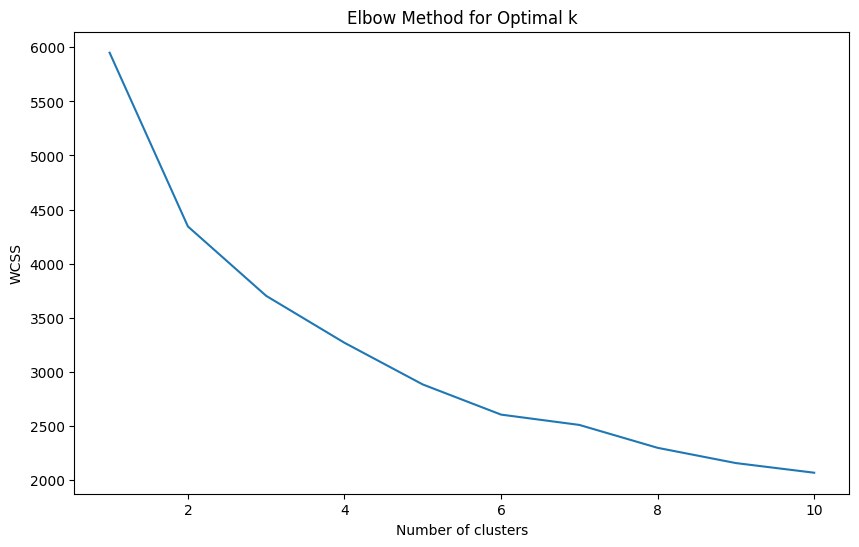

In [13]:
#Using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

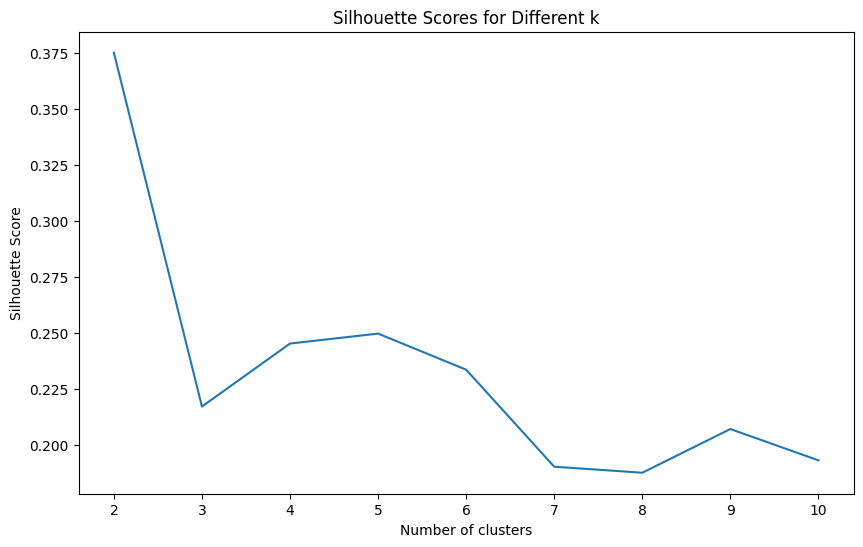

In [14]:
#Using Silhouette Coefficient
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#Clustering Model Creation
optimal_k = 4 #Kase andun yung elbow based sa nabasa ko
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_


In [16]:
#Group by clusters and calculate mean values for each feature
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

               Age  EducationLevel  YearsEmployed      Income   CardDebt  \
Cluster                                                                    
0        41.912844        1.587156      14.619266   65.119266   1.282601   
1        30.212719        1.673246       4.436404   28.070175   0.745746   
2        38.175000        1.956250      10.662500   58.812500   3.411750   
3        47.062500        2.000000      22.812500  204.250000  10.921875   

         OtherDebt  Defaulted  DebtIncomeRatio  
Cluster                                         
0         2.480445   0.109010         6.272477  
1         1.598509   0.274981         8.683114  
2         6.839256   0.401714        19.110000  
3        15.813688   0.549018        16.337500  
